# Find co-expressed accessory genes

Later we analyze core genes in relation to accessory genes. Therefore, this notebook reports the accessory genes that the core genes are most co-expressed with.

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import os
import random
import scipy
import pandas as pd
import seaborn as sns
import numpy as np
from scripts import utils, paths, gene_relationships, annotations

random.seed(1)

/home/alexandra/anaconda3/envs/core_acc/lib/python3.7/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


In [2]:
# User params
use_operon = True

### Load correlation matrix

In [3]:
# Load correlation matrix
pao1_corr_filename = paths.PAO1_CORR_LOG_SPELL
pa14_corr_filename = paths.PA14_CORR_LOG_SPELL

pao1_corr = pd.read_csv(pao1_corr_filename, sep="\t", index_col=0, header=0)
pa14_corr = pd.read_csv(pa14_corr_filename, sep="\t", index_col=0, header=0)

In [4]:
# Make a dataframe with gene ids
pao1_membership = pd.DataFrame(data=[], index=pao1_corr.index)
print(pao1_membership.shape)
pao1_membership.head()

(5563, 0)


""
PA0001
PA0002
PA0003
PA0004
PA0005


In [5]:
pa14_membership = pd.DataFrame(data=[], index=pa14_corr.index)
print(pa14_membership.shape)
pa14_membership.head()

(5887, 0)


""
PA14_55610
PA14_55600
PA14_55590
PA14_55580
PA14_55570


### Load and get least stable core genes

In [6]:
# Load transcriptional similarity df
# These are the subset of genes that we will consider
pao1_similarity_scores_filename = "pao1_similarity_scores_spell.tsv"
pa14_similarity_scores_filename = "pa14_similarity_scores_spell.tsv"

pao1_similarity_scores = pd.read_csv(
    pao1_similarity_scores_filename, sep="\t", header=0, index_col=0
)
pa14_similarity_scores = pd.read_csv(
    pa14_similarity_scores_filename, sep="\t", header=0, index_col=0
)

In [7]:
# Get most and least stable core genes
pao1_least_stable_genes = list(
    pao1_similarity_scores[pao1_similarity_scores["label"] == "least stable"].index
)

pa14_least_stable_genes = list(
    pa14_similarity_scores[pa14_similarity_scores["label"] == "least stable"].index
)

### Load core/accessory gene labels

In [8]:
# Read in expression data
pao1_expression_filename = paths.PAO1_COMPENDIUM
pa14_expression_filename = paths.PA14_COMPENDIUM

pao1_expression = pd.read_csv(pao1_expression_filename, sep="\t", index_col=0, header=0)
pa14_expression = pd.read_csv(pa14_expression_filename, sep="\t", index_col=0, header=0)

In [9]:
pao1_annot_filename = paths.GENE_PAO1_ANNOT
pa14_annot_filename = paths.GENE_PA14_ANNOT

core_acc_dict = utils.get_my_core_acc_genes(
    pao1_annot_filename, pa14_annot_filename, pao1_expression, pa14_expression
)

Number of PAO1 core genes: 5366
Number of PA14 core genes: 5363
Number of PAO1 core genes in my dataset: 5361
Number of PA14 core genes in my dataset: 5357
Number of PAO1-specific genes: 202
Number of PA14-specific genes: 530


In [10]:
pao1_core = core_acc_dict["core_pao1"]
pa14_core = core_acc_dict["core_pa14"]
pao1_acc = core_acc_dict["acc_pao1"]
pa14_acc = core_acc_dict["acc_pa14"]

In [11]:
pao1_membership.loc[pao1_core, "core/acc"] = "core"
pao1_membership.loc[pao1_acc, "core/acc"] = "acc"

In [12]:
# pa14_acc_shared = set(pa14_acc).intersection(pa14_gene_module_labels.index)
pa14_membership.loc[pa14_core, "core/acc"] = "core"
pa14_membership.loc[pa14_acc, "core/acc"] = "acc"

In [13]:
# Drop "module id" column
pao1_arr = pao1_membership
pa14_arr = pa14_membership

In [14]:
# Make sure to sort by gene id
# NOTE PA14 gene ids don't increment by 1, but by 10 or 20 are we missing some genes?
pao1_arr = pao1_arr.sort_index()
pa14_arr = pa14_arr.sort_index()

### Load operon annotations

In [15]:
pao1_operon_filename = paths.PAO1_OPERON
pa14_operon_filename = paths.PA14_OPERON

In [16]:
pao1_operon = annotations.load_format_operons(pao1_operon_filename)
pa14_operon = annotations.load_format_operons(pa14_operon_filename)

In [17]:
if use_operon:
    pao1_operon_expression_to_use = pao1_operon
    pa14_operon_expression_to_use = pa14_operon
else:
    pao1_operon_expression_to_use = None
    pa14_operon_expression_to_use = None

### Find all accessory genes co-expressed lasR gene

Our collaborator shared an experiment comparing the transcriptome of WT vs lasR mutant strains and found genes in PA14-only genes that were significant. So we were curious to see if any of these PA14-only DEGs (genes highlighted in red that were provided) were co-regulated by lasR according to our analysis.

In [18]:
pa14_lasR_acc_relationships = gene_relationships.find_related_acc_genes(
    pa14_corr,
    ["PA14_45960"],
    pa14_arr,
    40,
    pa14_operon_expression_to_use,
)

In [19]:
print(pa14_lasR_acc_relationships.shape)
pa14_lasR_acc_relationships.head()

(1, 1)


,Related acc genes
gene id,
PA14_45960,[PA14_21830]


In [20]:
# Read in PA14-only lasR genes
pa14_lasR_genes_Deb_filename = os.path.join(
    paths.LOCAL_DATA_DIR, "lasR regulated PA14 genes for Alex.csv"
)

In [21]:
pa14_lasR_genes_Deb = pd.read_csv(pa14_lasR_genes_Deb_filename, index_col=0, header=1)

In [22]:
print(pa14_lasR_genes_Deb.shape)
pa14_lasR_genes_Deb.head()

(78, 29)


,PAO1 ID,PA14_WT - Expression values,PA14_WT - Normalized expression values,PA14_WT - RPKM,PA14_delta lasR - Expression values,PA14_delta lasR - Normalized expression values,PA14_delta lasR - RPKM,PA14_P117L - Expression values,PA14_P117L - Normalized expression values,PA14_P117L - RPKM,...,PA14_WT - RPKM.1,PA14_delta lasR - RPKM.1,PA14_I215S - RPKM.1,PA14_lasR revert - RPKM.1,Unnamed: 24,PAO1 ID.2,PA14_WT - RPKM.2,PA14_delta lasR - RPKM.2,PA14_I215S - RPKM.2,PA14_lasR revert - RPKM.2
Feature ID,,,,,,,,,,,,,,,,,,,,,
PA14_28360,PA14_28360,586,504.2,505.257985,29,25.6,21.551879,11,23.4,19.686255,...,31.424530,32.674835,19.066339,37.677177,NaN,PA0346,4.973819,5.030108,4.252956,5.235619
PA14_36480,PA14_36480,258,214.2,210.427064,16,13.8,11.247952,22,46.0,37.244267,...,49.452202,34.904934,37.088113,47.060010,NaN,PA0080,5.627963,5.125359,5.212885,5.556430
PA14_36860,PA14_36860,122,100.8,116.878032,12,10.2,9.908910,7,15.2,13.919575,...,36.063543,34.949615,30.677617,35.414214,NaN,PA5532,5.172469,5.127205,4.939114,5.146257
PA14_36790,PA14_36790,63,51.8,84.497069,6,5.2,6.936237,0,0.4,0.000000,...,28.410372,34.915517,22.232095,27.816619,NaN,phoR,4.828346,5.125796,4.474572,4.797875
PA14_30890,PA14_30890,3,1.6,3.772191,0,0.0,0.000000,1,3.0,2.609920,...,37.289849,33.229769,22.325531,39.892994,NaN,PA1760,5.220711,5.054404,4.480623,5.318063


In [23]:
print(len(list(pa14_lasR_genes_Deb.index)))
shared_genes = set(pa14_lasR_genes_Deb.index).intersection(pa14_corr.index)
print(len(shared_genes))

78
55


In [24]:
# Format df for plotting
lasR_corr = pa14_corr.loc["PA14_45960"].to_frame("values")
lasR_corr["label"] = ""
lasR_corr.loc[pa14_acc, "label"] = "acc"
lasR_corr.loc[shared_genes, "label"] = "experiment DEGs"

In [25]:
lasR_corr.head()

,values,label
PA14_55610,-0.051349,
PA14_55600,0.042134,
PA14_55590,-0.022626,
PA14_55580,0.112478,
PA14_55570,-0.017737,


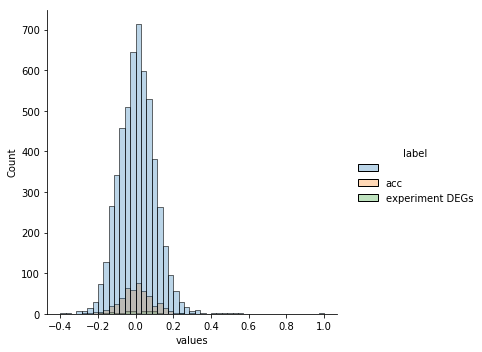

In [26]:
# Plot distribution of correlation scores
fig_pao1 = sns.displot(
    data=lasR_corr,
    x="values",
    hue="label",
    alpha=0.3,
    bins=np.linspace(-0.4, 1.0, 50),
)

In [27]:
# Let's try looking at genes within the same module as lasR
cluster_method = "affinity"
gene_subset = "all"
processed = "raw"
pa14_membership_filename = os.path.join(
    paths.LOCAL_DATA_DIR, f"pa14_modules_{cluster_method}_{gene_subset}_{processed}.tsv"
)

In [28]:
pa14_membership = pd.read_csv(pa14_membership_filename, sep="\t", index_col=0, header=0)

In [29]:
pa14_membership.head()

,module id
PA14_55610,69
PA14_55600,69
PA14_55590,69
PA14_55580,28
PA14_55570,97


In [30]:
lasR_module_id = pa14_membership.loc["PA14_45960"].values[0]
print(lasR_module_id)

178


In [31]:
# Get genes in the same module as lasR
lasR_coexpression_module_genes = pa14_membership[
    pa14_membership["module id"] == lasR_module_id
].index

In [32]:
# Compare gene lists
set(pa14_lasR_genes_Deb.index).intersection(lasR_coexpression_module_genes)

set()

If we look at the distribution of co-expression scores for lasR vs all genes, accessory genes, Deb’s genes, the correlation scores range from (-0.2, 0.2), which is lower compared to other core genes. The lasR accessory (PA14-only) genes are found starting in the top 40 genes.

If we cluster correlation matrix that includes all genes (core and accessory), there are 0 genes that are within the lasR cluster and found in Deb’s genes (highlighted ones only ~80).


### Find all accessory genes co-expressed with least stable core genes

In [33]:
%%time
pao1_least_acc_relationships = gene_relationships.find_related_acc_genes(
    pao1_corr,
    pao1_least_stable_genes,
    pao1_arr,
    10,
    pao1_operon_expression_to_use,
)

CPU times: user 3min 4s, sys: 49.8 ms, total: 3min 4s
Wall time: 3min 4s


In [34]:
pao1_least_acc_relationships.head()

,Related acc genes
gene id,
PA0711,No accessory genes
PA3230,[PA4623]
PA2521,No accessory genes
PA2222,"[PA2227, PA2228, PA2225, PA2221, PA1371, PA137..."
PA2522,No accessory genes


In [35]:
%%time
pa14_least_acc_relationships = gene_relationships.find_related_acc_genes(
    pa14_corr,
    pa14_least_stable_genes,
    pa14_arr,
    10,
    pa14_operon_expression_to_use,
)

CPU times: user 3min 15s, sys: 3.32 ms, total: 3min 15s
Wall time: 3min 15s


In [36]:
pa14_least_acc_relationships.head()

,Related acc genes
gene id,
PA14_38395,[PA14_35880]
PA14_46420,"[PA14_46590, PA14_48490, PA14_48450, PA14_4660..."
PA14_54520,No accessory genes
PA14_69580,No accessory genes
PA14_51205,No accessory genes


### Add accessory gene list to core-core annotation df

In [37]:
# Load current core-core annotations
pao1_core_stable_similarity_filename = "pao1_core_similarity_associations_spell.tsv"
pa14_core_stable_similarity_filename = "pa14_core_similarity_associations_spell.tsv"

In [38]:
pao1_all_associations = pd.read_csv(
    pao1_core_stable_similarity_filename, sep="\t", header=0, index_col=0
)
pa14_all_associations = pd.read_csv(
    pa14_core_stable_similarity_filename, sep="\t", header=0, index_col=0
)

In [39]:
print(pao1_all_associations.shape)
print(pa14_all_associations.shape)

(5349, 15)
(5348, 15)


In [40]:
# Merge KEGG associations with transcriptional similarity information
pao1_all_associations = pao1_all_associations.merge(
    pao1_least_acc_relationships, left_index=True, right_index=True, how="left"
)
pa14_all_associations = pa14_all_associations.merge(
    pa14_least_acc_relationships, left_index=True, right_index=True, how="left"
)

In [41]:
# Check that the dimension is consistent before and after merge
print(pao1_all_associations.shape)
print(pa14_all_associations.shape)

(5349, 16)
(5348, 16)


In [42]:
pao1_all_associations.head()

,PA14 homolog id,Transcriptional similarity across strains,P-value,Name,label,mean expression,standard deviation expression,min expression,25% expression,50% expression,75% expression,max expression,variance expression,range expression,pathways present,Related acc genes
PAO1 id,,,,,,,,,,,,,,,,
PA1839,PA14_40730,0.479379,1.533344e-305,NaN,NaN,132.804962,87.734616,4.087634,73.908945,115.812474,171.017374,821.445691,7.697363e+03,817.358057,[],NaN
PA1093,PA14_50280,0.399669,2.303959e-204,NaN,NaN,999.954597,1367.391295,0.057625,280.483419,722.971734,1317.661680,22264.320777,1.869759e+06,22264.263152,[],NaN
PA1947,PA14_39330,0.384830,2.260974e-188,rbsA,NaN,312.349358,380.589548,0.209768,107.163043,191.967653,381.118755,3768.828667,1.448484e+05,3768.618898,[],NaN
PA4672,PA14_61790,0.386774,2.023694e-190,NaN,NaN,448.826146,933.567419,6.160916,84.240169,160.854155,388.313280,12997.089379,8.715481e+05,12990.928463,[],NaN
PA2251,PA14_35470,0.259699,3.537348e-83,NaN,NaN,109.288623,80.205609,0.062196,64.545999,90.854359,137.165351,652.879274,6.432940e+03,652.817078,[],NaN


In [43]:
pao1_all_associations.sort_values(by="label").head()

,PA14 homolog id,Transcriptional similarity across strains,P-value,Name,label,mean expression,standard deviation expression,min expression,25% expression,50% expression,75% expression,max expression,variance expression,range expression,pathways present,Related acc genes
PAO1 id,,,,,,,,,,,,,,,,
PA0711,PA14_55117,0.127017,1.107108e-20,NaN,least stable,59.750374,339.907447,0.422330,10.487996,15.589250,27.028358,6097.121132,115537.072449,6096.698802,[],No accessory genes
PA1492,PA14_45120,0.154079,8.907021e-30,NaN,least stable,35.356934,53.646564,2.685238,15.755213,25.007646,37.538978,628.323335,2877.953809,625.638097,[],No accessory genes
PA5269,PA14_69580,0.195472,3.240257e-47,NaN,least stable,137.492808,99.205880,11.777482,74.968006,117.090438,172.732983,1127.963815,9841.806692,1116.186333,[],No accessory genes
PA3835,PA14_14430,0.153251,1.798165e-29,NaN,least stable,70.565761,95.828486,0.087195,30.297540,50.420484,84.343487,1599.554222,9183.098746,1599.467027,[],"[PA1388, PA1386]"
PA3994,PA14_12150,0.197163,5.072957e-48,NaN,least stable,42.191565,62.353189,0.692849,14.815033,27.513399,49.124961,1476.359397,3887.920148,1475.666548,[],No accessory genes


In [44]:
pa14_all_associations.sort_values(by="label").head()

,PAO1 homolog id,Transcriptional similarity across strains,P-value,Name,label,mean expression,standard deviation expression,min expression,25% expression,50% expression,75% expression,max expression,variance expression,range expression,pathways present,Related acc genes
PA14 id,,,,,,,,,,,,,,,,
PA14_38410,PA2018,0.198557,1.108008e-48,amrB,least stable,257.479850,462.490221,0.448216,77.848195,127.608897,279.630458,5877.543640,2.138972e+05,5877.095424,['KEGG-Pathway-pae00312: beta-Lactam resistance'],"[PA14_36010, PA14_36020, PA14_35890, PA14_36030]"
PA14_58800,PA4531,0.167987,3.798107e-35,NaN,least stable,64.665745,41.496157,3.263571,38.955228,56.215143,76.759228,326.103797,1.721931e+03,322.840226,[],No accessory genes
PA14_05840,PA0447,0.187250,2.135663e-43,gcdH,least stable,1833.883981,2193.669311,61.558864,360.850439,1267.439514,2334.314268,18482.536397,4.812185e+06,18420.977532,['KEGG-Pathway-pae00071: Fatty acid degradatio...,No accessory genes
PA14_53510,PA0832,0.205660,3.582239e-52,NaN,least stable,106.804727,39.334508,13.523229,81.782131,103.935849,127.059908,311.103286,1.547204e+03,297.580057,[],No accessory genes
PA14_36900,PA2170,0.023376,8.739808e-02,NaN,least stable,103.613061,76.996638,5.974187,52.240193,86.969839,133.935655,708.234705,5.928482e+03,702.260518,NaN,"[PA14_35750, PA14_24190, PA14_40740]"


In [45]:
# Save
pao1_all_associations.to_csv(
    "pao1_core_similarity_associations_final_spell.tsv", sep="\t"
)
pa14_all_associations.to_csv(
    "pa14_core_similarity_associations_final_spell.tsv", sep="\t"
)